In [3]:
!pip install gym
!pip install numpy
!pip install matplotlib
!pip install pygame

In [46]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import pygame

In [30]:
env=gym.make('CartPole-v1')

In [77]:
alpha = 0.1
gamma = 0.95
epsilon = 1
epsilon_runs = 8000
epsilon_decay = 0.0002
NUM_EPISODES = 10000 

num_actions = env.action_space.n
upper_bound = env.observation_space.high
lower_bound = env.observation_space.low
upper_bound[1] = 10
upper_bound[3] = 10
lower_bound[1] = -10
lower_bound[3] = -10
num_observations = len(env.observation_space.high)
num_bins = [20,50,20,50]

In [78]:
def q_table_init():
    Q_table = np.random.uniform(low=0, high = 1, size=(num_bins+ [num_actions]))
    return Q_table

In [79]:
print(tuple([20]))

(20,)


In [80]:
print(Q_table[(1,1,1,1)])

[0.03227044 0.97145109]


In [81]:
print(np.linspace(-4.0,4.0,10))

[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  4.        ]


In [82]:
def get_bins():
    
    bins = []
    for i in range(4):
        bins.append(np.linspace(lower_bound[i],upper_bound[i],num_bins[i]))   
    return bins

In [83]:
def getIndexFromBin(bin, value):
    if value < bin[0] or value > bin[len(bin)-1] :
        return False
    
    for i in range(len(bin)-1):
        if value >= bin[i] and value < bin[i+1]:
            return i

In [84]:
def get_state(bins, obs):
    state = []
    for i in range(len(obs)):
        state.append(np.digitize(obs[i],bins[i])-1)
        
    return tuple(state)
    

In [85]:
bins = get_bins()
print(get_state(bins,[-2,-10,0.1,393]))

(5, 0, 11, 49)


In [86]:
max_iters = 10000
rewards = []
Q_table = q_table_init()
for i in range(NUM_EPISODES):
    
    current_state = get_state(bins,env.reset()[0])
    reward = 0
    done = False
    j = 0
    if i < epsilon_runs:
        epsilon = epsilon - epsilon_decay
    while(not done):
        
        
        if np.random.random() > epsilon:
            action = np.argmax(Q_table[current_state])
        else:
            action = np.random.randint(0,num_actions)
        
        observation, r, d, _, _ = env.step(action)
        done = d
        reward += r
        next_state = get_state(bins,observation)
            
        Q_max = np.max(Q_table[next_state])
        Q_sa = Q_table[current_state + tuple([action])]
        
        if done and reward < 200:
            r = -500
            
        new_Q = (1 - alpha)*Q_sa + alpha*(r + gamma * Q_max)
        Q_table[current_state + tuple([action])] = new_Q
        
        current_state = next_state
        
    rewards.append(reward)
    
        
    

13.0
18.0
9.0
15.0
26.0
18.0
23.0
11.0
17.0
18.0
16.0
21.0
26.0
20.0
12.0
17.0
26.0
14.0
57.0
19.0
11.0
46.0
12.0
10.0
21.0
21.0
16.0
22.0
50.0
17.0
18.0
36.0
32.0
21.0
40.0
15.0
21.0
46.0
26.0
30.0
38.0
22.0
34.0
13.0
27.0
19.0
21.0
11.0
40.0
14.0
23.0
14.0
14.0
11.0
40.0
13.0
15.0
20.0
32.0
25.0
49.0
18.0
34.0
32.0
22.0
13.0
53.0
22.0
17.0
29.0
18.0
10.0
57.0
11.0
9.0
11.0
21.0
18.0
21.0
15.0
69.0
37.0
39.0
29.0
11.0
16.0
13.0
15.0
11.0
17.0
20.0
30.0
45.0
28.0
22.0
16.0
31.0
13.0
39.0
13.0
13.0
35.0
13.0
16.0
16.0
32.0
12.0
70.0
15.0
12.0
20.0
24.0
13.0
28.0
12.0
17.0
16.0
21.0
15.0
9.0
31.0
37.0
26.0
23.0
11.0
15.0
32.0
12.0
16.0
15.0
11.0
26.0
43.0
14.0
10.0
15.0
16.0
11.0
59.0
11.0
15.0
14.0
40.0
18.0
55.0
17.0
14.0
16.0
9.0
12.0
26.0
20.0
37.0
32.0
40.0
54.0
33.0
36.0
29.0
47.0
21.0
45.0
36.0
42.0
16.0
33.0
22.0
17.0
27.0
17.0
36.0
15.0
13.0
26.0
17.0
15.0
25.0
28.0
10.0
10.0
11.0
11.0
16.0
11.0
12.0
29.0
41.0
24.0
10.0
31.0
16.0
13.0
17.0
22.0
16.0
27.0
14.0
25.0
15.0
14.0
12.0

69.0
40.0
87.0
81.0
49.0
29.0
38.0
60.0
61.0
164.0
51.0
76.0
45.0
40.0
100.0
15.0
23.0
49.0
47.0
17.0
55.0
42.0
15.0
81.0
100.0
94.0
54.0
33.0
21.0
197.0
25.0
24.0
42.0
91.0
23.0
37.0
24.0
22.0
69.0
62.0
31.0
64.0
22.0
72.0
121.0
22.0
22.0
43.0
17.0
94.0
56.0
31.0
70.0
23.0
37.0
61.0
56.0
78.0
63.0
72.0
50.0
99.0
26.0
38.0
74.0
121.0
71.0
44.0
100.0
73.0
33.0
17.0
43.0
76.0
36.0
47.0
60.0
33.0
30.0
57.0
24.0
53.0
73.0
31.0
36.0
95.0
50.0
29.0
44.0
67.0
12.0
54.0
12.0
31.0
56.0
43.0
93.0
111.0
13.0
16.0
69.0
30.0
48.0
102.0
26.0
35.0
20.0
21.0
63.0
40.0
116.0
93.0
75.0
67.0
46.0
72.0
35.0
49.0
37.0
50.0
78.0
46.0
12.0
21.0
24.0
60.0
63.0
155.0
64.0
99.0
37.0
30.0
52.0
23.0
39.0
51.0
66.0
16.0
46.0
31.0
19.0
40.0
112.0
79.0
30.0
17.0
33.0
22.0
104.0
19.0
26.0
41.0
24.0
46.0
62.0
20.0
95.0
63.0
31.0
49.0
52.0
15.0
90.0
23.0
29.0
71.0
31.0
58.0
69.0
47.0
63.0
11.0
20.0
19.0
35.0
46.0
63.0
50.0
45.0
101.0
117.0
63.0
79.0
52.0
52.0
101.0
69.0
33.0
132.0
163.0
123.0
66.0
27.0
52.0
70.0
82.0
1

140.0
41.0
161.0
161.0
133.0
131.0
52.0
113.0
60.0
116.0
94.0
96.0
177.0
147.0
31.0
145.0
58.0
26.0
100.0
167.0
121.0
109.0
125.0
118.0
110.0
145.0
25.0
71.0
92.0
110.0
123.0
42.0
137.0
85.0
191.0
80.0
118.0
136.0
110.0
58.0
89.0
158.0
91.0
95.0
116.0
145.0
63.0
128.0
171.0
127.0
77.0
107.0
144.0
84.0
157.0
83.0
151.0
139.0
65.0
155.0
90.0
123.0
176.0
55.0
27.0
80.0
135.0
105.0
68.0
121.0
42.0
168.0
132.0
177.0
51.0
191.0
90.0
176.0
91.0
145.0
185.0
105.0
109.0
108.0
151.0
131.0
151.0
152.0
104.0
104.0
105.0
114.0
68.0
176.0
172.0
118.0
134.0
61.0
159.0
182.0
178.0
51.0
88.0
84.0
128.0
124.0
125.0
143.0
119.0
145.0
129.0
72.0
127.0
138.0
72.0
111.0
100.0
109.0
141.0
78.0
110.0
122.0
130.0
65.0
165.0
66.0
119.0
166.0
139.0
148.0
169.0
58.0
100.0
161.0
127.0
160.0
168.0
130.0
157.0
114.0
108.0
149.0
146.0
117.0
85.0
90.0
177.0
129.0
21.0
143.0
144.0
154.0
125.0
73.0
134.0
97.0
153.0
95.0
135.0
140.0
98.0
99.0
166.0
121.0
98.0
149.0
122.0
177.0
124.0
70.0
199.0
26.0
103.0
35.0
153.0
32.0


178.0
157.0
150.0
163.0
164.0
156.0
195.0
174.0
143.0
152.0
151.0
138.0
140.0
135.0
155.0
136.0
147.0
152.0
179.0
134.0
151.0
163.0
149.0
161.0
145.0
142.0
137.0
132.0
152.0
141.0
172.0
146.0
177.0
158.0
127.0
159.0
146.0
165.0
162.0
177.0
132.0
177.0
148.0
155.0
195.0
154.0
150.0
162.0
124.0
144.0
155.0
136.0
139.0
184.0
155.0
158.0
129.0
169.0
157.0
141.0
127.0
138.0
169.0
164.0
145.0
173.0
110.0
150.0
116.0
121.0
141.0
117.0
149.0
148.0
124.0
114.0
123.0
112.0
152.0
137.0
148.0
128.0
147.0
135.0
157.0
148.0
159.0
142.0
135.0
164.0
150.0
160.0
141.0
164.0
137.0
154.0
143.0
139.0
131.0
141.0
151.0
151.0
174.0
159.0
147.0
145.0
142.0
140.0
136.0
147.0
151.0
159.0
128.0
144.0
129.0
148.0
159.0
142.0
152.0
153.0
128.0
158.0
140.0
152.0
133.0
130.0
136.0
133.0
169.0
161.0
142.0
161.0
163.0
143.0
124.0
133.0
160.0
143.0
143.0
136.0
146.0
135.0
145.0
126.0
151.0
142.0
149.0
127.0
134.0
138.0
147.0
153.0
156.0
148.0
145.0
121.0
142.0
151.0
143.0
152.0
162.0
142.0
141.0
168.0
128.0
134.0
133.

142.0
160.0
144.0
133.0
122.0
138.0
129.0
148.0
160.0
130.0
129.0
155.0
129.0
135.0
139.0
145.0
156.0
132.0
151.0
138.0
138.0
140.0
137.0
137.0
146.0
151.0
139.0
137.0
151.0
139.0
134.0
140.0
139.0
141.0
148.0
135.0
142.0
150.0
146.0
145.0
124.0
139.0
142.0
142.0
132.0
132.0
141.0
131.0
130.0
141.0
148.0
137.0
144.0
145.0
143.0
127.0
131.0
142.0
132.0
148.0
140.0
154.0
144.0
145.0
125.0
130.0
133.0
162.0
143.0
140.0
144.0
166.0
140.0
143.0
131.0
135.0
126.0
125.0
137.0
132.0
145.0
137.0
130.0
140.0
135.0
142.0
136.0
133.0
136.0
133.0
138.0
134.0
137.0
144.0
134.0
127.0
127.0
132.0
142.0
135.0
144.0
124.0
133.0
135.0
146.0
125.0
134.0
149.0
150.0
137.0
149.0
144.0
147.0
138.0
131.0
139.0
135.0
138.0
127.0
116.0
125.0
139.0
142.0
136.0
134.0
135.0
135.0
148.0
138.0
148.0
139.0
145.0
134.0
137.0
137.0
139.0
132.0
138.0
138.0
146.0
140.0
130.0
129.0
140.0
147.0
145.0
141.0
143.0
132.0
135.0
132.0
133.0
137.0
132.0
137.0
139.0
135.0
148.0
132.0
134.0
135.0
133.0
161.0
141.0
141.0
139.0
141.

113.0
140.0
130.0
117.0
134.0
124.0
142.0
136.0
140.0
131.0
131.0
135.0
138.0
132.0
134.0
131.0
114.0
134.0
148.0
133.0
128.0
115.0
136.0
133.0
138.0
129.0
113.0
119.0
131.0
139.0
118.0
130.0
119.0
142.0
130.0
133.0
119.0
117.0
153.0
139.0
149.0
120.0
145.0
133.0
115.0
136.0
124.0
124.0
146.0
135.0
151.0
149.0
135.0
124.0
134.0
128.0
138.0
136.0
139.0
135.0
137.0
156.0
150.0
132.0
129.0
137.0
153.0
123.0
131.0
133.0
119.0
135.0
138.0
123.0
134.0
136.0
131.0
125.0
128.0
132.0
159.0
150.0
128.0
158.0
139.0
131.0
149.0
132.0
135.0
138.0
135.0
135.0
131.0
141.0
155.0
135.0
136.0
140.0
126.0
133.0
140.0
141.0
132.0
135.0
130.0
137.0
145.0
124.0
158.0
137.0
126.0
136.0
136.0
120.0
131.0
125.0
136.0
139.0
143.0
134.0
131.0
140.0
130.0
140.0
155.0
132.0
124.0
132.0
138.0
157.0
128.0
138.0
137.0
125.0
145.0
131.0
135.0
137.0
140.0
132.0
153.0
133.0
130.0
148.0
122.0
146.0
140.0
183.0
147.0
137.0
175.0
120.0
131.0
159.0
141.0
168.0
142.0
172.0
165.0
173.0
157.0
137.0
161.0
157.0
171.0
148.0
129.

161.0
162.0
127.0
165.0
133.0
134.0
144.0
126.0
193.0
134.0
158.0
192.0
168.0
178.0
163.0
167.0
158.0
133.0
159.0
175.0
155.0
173.0
170.0
179.0
163.0
189.0
152.0
131.0
164.0
189.0
173.0
177.0
170.0
145.0
156.0
159.0
194.0
170.0
147.0
129.0
196.0
142.0
153.0
150.0
176.0
175.0
154.0
149.0
172.0
190.0
167.0
143.0
125.0
170.0
132.0
172.0
156.0
186.0
163.0
131.0
135.0
160.0
168.0
158.0
123.0
178.0
174.0
153.0
176.0
139.0
145.0
158.0
169.0
143.0
158.0
181.0
171.0
150.0
128.0
149.0
179.0
158.0
151.0
133.0
155.0
155.0
193.0
157.0
166.0
193.0
122.0
147.0
136.0
138.0
153.0
158.0
165.0
153.0
134.0
173.0
142.0
185.0
154.0
150.0
129.0
155.0
162.0
152.0
161.0
168.0
143.0
145.0
172.0
145.0
161.0
114.0
122.0
155.0
144.0
170.0
139.0
126.0
126.0
128.0
119.0
193.0
132.0
114.0
153.0
180.0
167.0
180.0
182.0
122.0
136.0
135.0
160.0
130.0
145.0
139.0
120.0
118.0
185.0
160.0
149.0
132.0
131.0
196.0
131.0
152.0
144.0
161.0
140.0
168.0
146.0
162.0
148.0
143.0
131.0
136.0
177.0
197.0
142.0
151.0
134.0
136.0
168.

In [87]:
print(rewards)

[13.0, 18.0, 9.0, 15.0, 26.0, 18.0, 23.0, 11.0, 17.0, 18.0, 16.0, 21.0, 26.0, 20.0, 12.0, 17.0, 26.0, 14.0, 57.0, 19.0, 11.0, 46.0, 12.0, 10.0, 21.0, 21.0, 16.0, 22.0, 50.0, 17.0, 18.0, 36.0, 32.0, 21.0, 40.0, 15.0, 21.0, 46.0, 26.0, 30.0, 38.0, 22.0, 34.0, 13.0, 27.0, 19.0, 21.0, 11.0, 40.0, 14.0, 23.0, 14.0, 14.0, 11.0, 40.0, 13.0, 15.0, 20.0, 32.0, 25.0, 49.0, 18.0, 34.0, 32.0, 22.0, 13.0, 53.0, 22.0, 17.0, 29.0, 18.0, 10.0, 57.0, 11.0, 9.0, 11.0, 21.0, 18.0, 21.0, 15.0, 69.0, 37.0, 39.0, 29.0, 11.0, 16.0, 13.0, 15.0, 11.0, 17.0, 20.0, 30.0, 45.0, 28.0, 22.0, 16.0, 31.0, 13.0, 39.0, 13.0, 13.0, 35.0, 13.0, 16.0, 16.0, 32.0, 12.0, 70.0, 15.0, 12.0, 20.0, 24.0, 13.0, 28.0, 12.0, 17.0, 16.0, 21.0, 15.0, 9.0, 31.0, 37.0, 26.0, 23.0, 11.0, 15.0, 32.0, 12.0, 16.0, 15.0, 11.0, 26.0, 43.0, 14.0, 10.0, 15.0, 16.0, 11.0, 59.0, 11.0, 15.0, 14.0, 40.0, 18.0, 55.0, 17.0, 14.0, 16.0, 9.0, 12.0, 26.0, 20.0, 37.0, 32.0, 40.0, 54.0, 33.0, 36.0, 29.0, 47.0, 21.0, 45.0, 36.0, 42.0, 16.0, 33.0, 22.0, 1

In [88]:
print(len(rewards))

10000


In [89]:
# avergae over 10 episodes and plot
avg_rewards = []
max_rewards = []
min_rewards = []
runs = []
i = 0
while i < len(rewards) - 100:
    avg_rewards.append(np.mean(rewards[i:i+10]))
    max_rewards.append(np.max(rewards[i:i+10]))
    min_rewards.append(np.min(rewards[i:i+10]))
    runs.append(i)
    i += 100

In [90]:
print(avg_rewards)

[16.8, 23.4, 26.1, 28.0, 21.4, 28.6, 24.9, 26.1, 39.0, 27.4, 29.6, 29.8, 29.6, 38.2, 40.5, 57.5, 51.3, 50.8, 47.5, 61.9, 61.0, 78.1, 59.7, 91.1, 77.3, 99.7, 84.9, 97.6, 71.7, 102.6, 105.0, 155.2, 117.7, 112.9, 111.1, 160.6, 134.8, 167.3, 141.9, 154.2, 166.3, 160.7, 138.5, 144.9, 146.6, 167.5, 171.0, 152.3, 155.1, 140.1, 132.4, 140.8, 143.7, 133.1, 126.7, 134.4, 138.1, 140.7, 137.9, 141.5, 136.4, 147.4, 133.6, 137.3, 141.6, 135.4, 140.0, 131.7, 124.2, 131.9, 129.6, 127.7, 142.0, 130.4, 135.5, 131.6, 130.5, 135.0, 133.8, 163.5, 160.3, 156.9, 161.9, 172.8, 150.0, 149.0, 157.7, 140.1, 148.7, 149.4, 160.9, 152.0, 155.5, 154.2, 142.7, 172.6, 174.6, 174.1, 172.3]


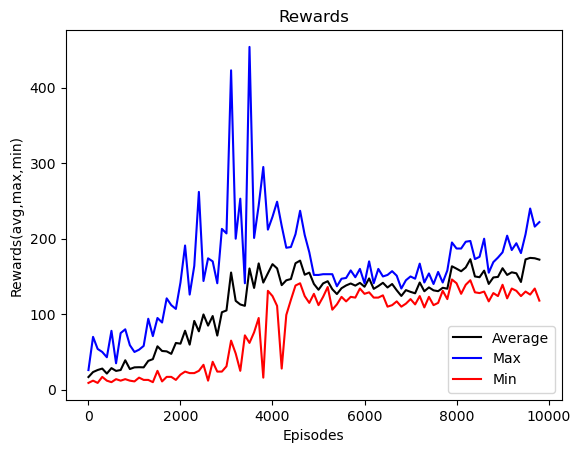

In [91]:
plt.plot(runs, avg_rewards, label='Average', color='black')
plt.plot(runs, max_rewards, label='Max', color='blue')
plt.plot(runs, min_rewards, label='Min', color='red')
plt.title('Rewards')
plt.xlabel('Episodes')
plt.ylabel('Rewards(avg,max,min)')
plt.legend(loc=4)
plt.show()